In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv("C:/Users/maila/OneDrive/Desktop/task3/Clustering_Data.csv")

In [27]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [11]:
features = data.drop(columns = 'Customer_Segment')
features.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [41]:
scaled_features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [139]:
def optimal_clusters(data, max_k=10):
    inertias = []
    silhouette_scores = []
    cluster_labels = {}
    cluster_range = range(2, max_k + 1)

    for k in cluster_range:
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]
        prev_centroids = np.zeros_like(centroids)
        cluster_assignment = np.zeros(data.shape[0])

        for _ in range(300):
            distances = np.linalg.norm(data[:, None] - centroids, axis=2)
            cluster_assignment = np.argmin(distances, axis=1)
            
            for i in range(k):
                centroids[i] = data[cluster_assignment == i].mean(axis=0)
            #Checking for any convergence
            if np.allclose(prev_centroids, centroids):
                break
            prev_centroids = centroids

        # Calculate inertia and silhouette score
        inertias.append(sum(np.min(distances, axis=1)))
        silhouette_scores.append(silhouette_score(data, cluster_assignment))
        cluster_labels[k] = cluster_assignment

    return cluster_range, inertias, silhouette_scores, cluster_labels


In [111]:
cluster_range, inertias, silhouette_scores, cluster_labels = optimal_clusters(scaled_features)

In [113]:
cluster_range

range(2, 11)

In [115]:
inertias

[588.4824019986924,
 498.2138364758737,
 452.11767274016603,
 432.43410989328544,
 427.2949613732264,
 424.0130186067571,
 407.681125743693,
 425.6128608499345,
 431.33095601197334]

In [117]:
silhouette_scores

[0.14713580501855406,
 0.21310378252764922,
 0.19595085973845452,
 0.248080261345658,
 0.128592573173874,
 0.14972230748091525,
 0.11644511386947634,
 0.06726209247851804,
 0.12698338873090345]

In [119]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

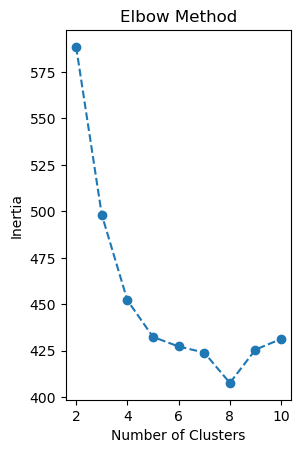

In [121]:
#elbow method
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

#elbow of the curve dictates the optimal number of clusters 

In [129]:
#from elbow method we get optimal number of clusters as 8
optimal_k = 8
data['Cluster'] = cluster_labels[optimal_k]

Text(0.5, 1.0, 'Silhouette Analysis')

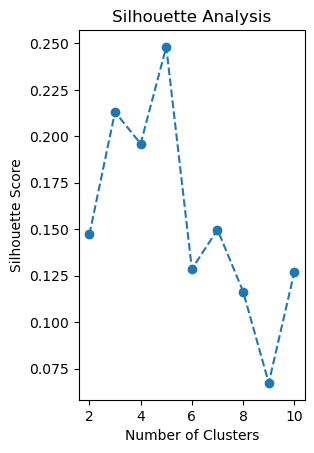

In [131]:
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

In [133]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [135]:
#PCA VISUALISATION

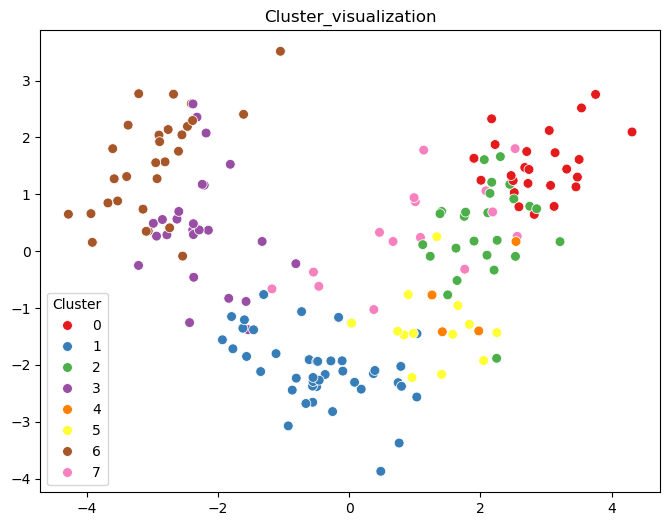

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(scaled_features)
plt.figure(figsize = (8,6))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1],
    hue=data['Cluster'], palette='Set1', s=50
)
plt.title("Cluster_visualization")
plt.show()